In [21]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
import numpy as np 
import torchvision 
import torchvision.transforms as transforms

In [22]:
#Load the data
tran_dataset = torchvision.datasets.MNIST(
    root = ".",
    train=True,
    transform= transforms.ToTensor(),
    download=True
)

In [23]:
X_train = tran_dataset.data 
Y_train = tran_dataset.targets

In [24]:
print(X_train)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [25]:
torch.max(X_train)

tensor(255, dtype=torch.uint8)

In [26]:
X_train.shape

torch.Size([60000, 28, 28])

In [27]:
print(Y_train)

tensor([5, 0, 4,  ..., 5, 6, 8])


In [28]:
Y_train.shape

torch.Size([60000])

In [29]:
#Load the data
test_dataset = torchvision.datasets.MNIST(
    root = ".",
    train=False,
    transform= transforms.ToTensor(),
    download=True
)

In [30]:
test_dataset.data.shape 

torch.Size([10000, 28, 28])

In [31]:
#Build the Model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [33]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [35]:
#Batch
batch_size = 128 
train_loader = torch.utils.data.DataLoader(
    dataset = tran_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset = test_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [36]:
#Training
n_epochs = 10
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
for i in range(n_epochs):
    train_loss = []
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 784)
        optimizer.zero_grad()
        #training
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
    train_loss = np.mean(train_loss)
    test_loss = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 784)
       
        #training
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    test_loss = np.mean(test_loss)
    train_losses[i] = train_loss
    test_losses[i] = test_loss 
    print(f"Epochs {i+1}/{n_epochs}: Train Loss {train_loss:.4f}, Test Loss {test_loss:.4f}")


Epochs 1/10: Train Loss 0.4101, Test Loss 0.2334
Epochs 2/10: Train Loss 0.1993, Test Loss 0.1622
Epochs 3/10: Train Loss 0.1418, Test Loss 0.1262
Epochs 4/10: Train Loss 0.1092, Test Loss 0.1039
Epochs 5/10: Train Loss 0.0875, Test Loss 0.0972
Epochs 6/10: Train Loss 0.0731, Test Loss 0.0880
Epochs 7/10: Train Loss 0.0607, Test Loss 0.0799
Epochs 8/10: Train Loss 0.0514, Test Loss 0.0774
Epochs 9/10: Train Loss 0.0440, Test Loss 0.0747
Epochs 10/10: Train Loss 0.0374, Test Loss 0.0729


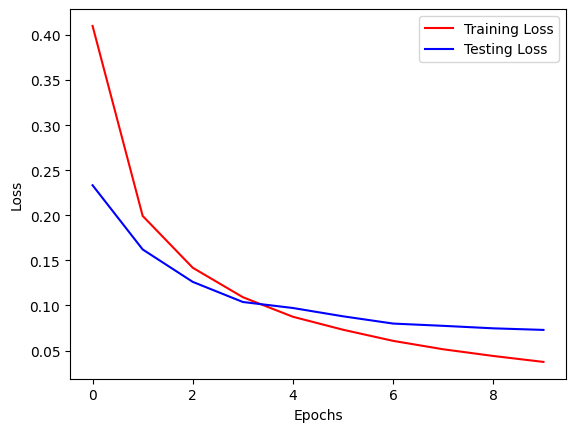

In [37]:
plt.plot(train_losses, "r", label="Training Loss")
plt.plot(test_losses, "b", label="Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [38]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0228,  0.0220,  0.0023,  ...,  0.0349,  0.0196, -0.0013],
                      [-0.0069,  0.0064, -0.0109,  ...,  0.0041,  0.0346,  0.0298],
                      [-0.0353, -0.0135,  0.0160,  ..., -0.0084,  0.0123,  0.0037],
                      ...,
                      [ 0.0211,  0.0140, -0.0151,  ..., -0.0023, -0.0273,  0.0122],
                      [ 0.0134,  0.0066, -0.0226,  ...,  0.0347,  0.0329,  0.0198],
                      [-0.0098,  0.0111,  0.0329,  ..., -0.0195,  0.0212, -0.0280]],
                     device='cuda:0')),
             ('0.bias',
              tensor([-3.1184e-03, -4.6450e-02,  4.4881e-02,  1.8580e-02,  7.4798e-03,
                      -2.0044e-02,  2.7459e-02,  3.1769e-02, -5.9403e-02, -6.7668e-02,
                      -1.0908e-03,  2.5067e-01,  8.1510e-02, -7.8536e-02, -5.6785e-02,
                       3.2297e-02,  1.7016e-01, -6.7442e-02,  1.2194e-01,  2.9561e-02,
                       1.3270e

In [39]:
torch.save(model.state_dict(), "MNIST model.pt")

<h3>Load the saved model and analyze accuracy and confusion matrix </h3>

In [40]:
#Build the Model
model2 = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [43]:
model2.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [44]:
model2.load_state_dict(torch.load("MNIST model.pt"))

<All keys matched successfully>

In [45]:
#Train
n_correct = 0
n_total = 0 

for inputs, targets in train_loader:

    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1, 784)

    outputs = model2(inputs)

    _, prediction = torch.max(outputs, 1)

    n_correct += (targets==prediction).sum().item()
    n_total += targets.shape[0]

train_accuracy = n_correct / n_total

#Test

n_correct = 0
n_total = 0 

for inputs, targets in test_loader:

    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1, 784)

    outputs = model2(inputs)

    _, prediction = torch.max(outputs, 1)

    n_correct += (targets==prediction).sum().item()
    n_total += targets.shape[0]

test_accuracy = n_correct / n_total

In [46]:
print(train_accuracy)
print(test_accuracy)

0.9934
0.9781


In [47]:
from sklearn.metrics import confusion_matrix

import pandas as pd
import itertools

In [48]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized COonfusion Matrix")
    else: 
        print("COnfusion Matrix, without normalization") 

    print(cm) 

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thres = cm.max() / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                    color="white" if cm[i, j] > thres else "black")
    plt.tight_layout()
    plt.ylabel("True label") 
    plt.xlabel("Predicted label")
    plt.show    



COnfusion Matrix, without normalization
[[ 98 119 107 101  82 102 100  85  96  90]
 [ 97 126 116 128 135 104  93 108 114 114]
 [123 122 132  85  92  87  95  95  96 105]
 [ 88 113  91 110 101  87 109 103  97 111]
 [ 94 121 103 104 104  84  80  93 101  98]
 [ 99  99  95  83  85  80  83  90  80  98]
 [ 96  91 103 107  93  72 104 102  93  97]
 [101 124 104  87 100  98 107 116  99  92]
 [ 90 102  98  98  88  99  86 109  90 114]
 [106 117  98  98  95  77  94 115 109 100]]


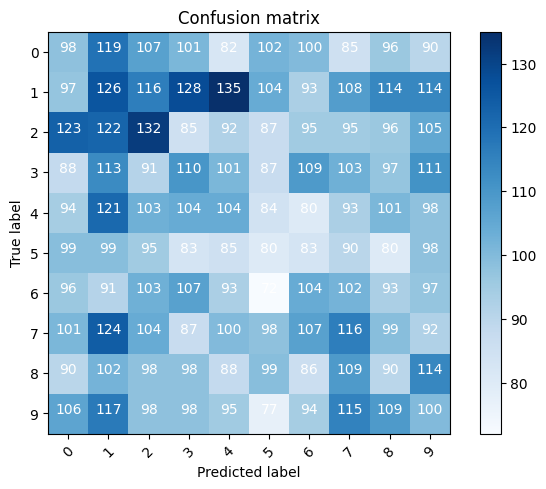

In [49]:
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([]) 

for inputs, targets in test_loader:
    inputs = inputs.to(device)

    inputs = inputs.view(-1, 784)

    outputs = model(inputs) 

    _, predictions = torch.max(outputs, 1)

    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


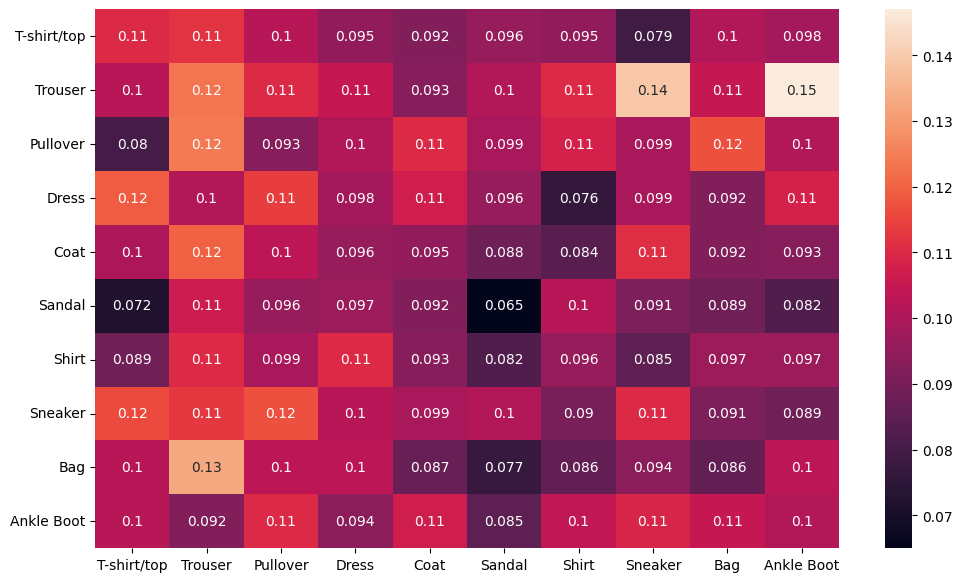

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([]) 

for inputs, targets in test_loader:
    inputs = inputs.to(device)

    inputs = inputs.view(-1, 784)

    outputs = model(inputs) 

    _, predictions = torch.max(outputs, 1)

    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
       

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Build confusion matrix

df_cm = pd.DataFrame(cm/np.sum(cm) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

Text(0.5, 1.0, 'True label: 8 Predicted: 4')

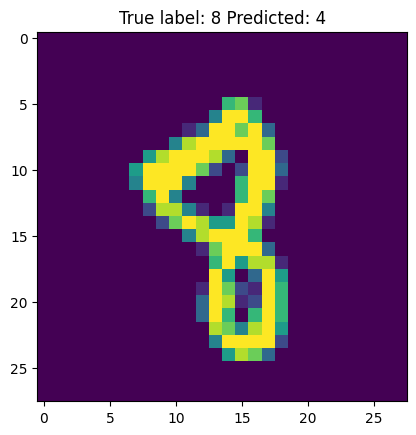

In [70]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
#print(x_test[i])
plt.imshow(x_test[i])
plt.title(f"True label: {y_test[i]} Predicted: {int(p_test[i])}")

Text(0.5, 1.0, 'True label: 8 Predicted: 6')

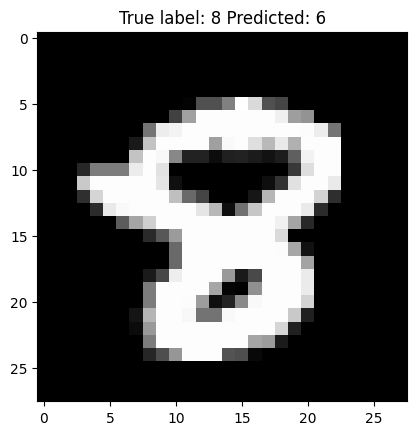

In [72]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
#print(x_test[i])
plt.imshow(x_test[i], cmap="gray")
plt.title(f"True label: {y_test[i]} Predicted: {int(p_test[i])}")